<h1>Forecasting Covid-19 Spread</h1>
<h4>In this notebook, I studied the given Covid-19 data and used various ML techniques to anticipate the spread of the virus.</h4>

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model

covid_data = pd.read_csv('../Datamind - Covid - ml_forecasting_case_data/ml_covid_case_data.csv',sep=";",index_col='Date',infer_datetime_format=True)
covid_data.head()

,Case,Death,Recovered,Month,Season,Weekday,Weekend,OfficailHoliday,BusinessDay,Doses_admin,People_partially_vaccinated,People_fully_vaccinated
Date,,,,,,,,,,,,
11.03.2020,1,0,0,3,2,1,0,0,0,0,0,0
12.03.2020,1,0,0,3,2,1,0,0,0,0,0,0
13.03.2020,5,0,0,3,2,1,0,0,0,0,0,0
14.03.2020,5,0,0,3,2,0,1,0,1,0,0,0
15.03.2020,6,0,0,3,2,0,1,0,1,0,0,0


<h4>Firstly, I wanted to use only a few of the columns to showcase the spread of Covid-19 so far.</h4>

In [205]:
new_columns = ['Case', 'Death', 'Recovered', 'People_partially_vaccinated', 'People_fully_vaccinated']
covid_data = covid_data.drop([c for c in covid_data.columns if
                              c not in new_columns], axis=1)

In [206]:
new_covid_data = pd.DataFrame({'Case': covid_data['Case'],
                               'Death': covid_data['Death'],
                               'Recovered': covid_data['Recovered'],
                               'People_partially_vaccinated': covid_data['People_partially_vaccinated'],
                               'People_fully_vaccinated' : covid_data['People_fully_vaccinated']})

In [207]:
curfew_data = pd.read_csv('/Users/begumzengin/Desktop/Datamind - Covid - ml_forecasting_case_data/curfew_csv.csv', sep=';', index_col='Date',infer_datetime_format=True)
curfew_data.head()

,DayNo,Weekday,Weekend,FullCurfew,PartialCurfew,UnderTwenty,OverSixtyFive,CurfewStartsAt,CurfewEndsAt
Date,,,,,,,,,
11.03.2020,3,1,0,0,0,NaN,NaN,NaN,NaN
12.03.2020,4,1,0,0,0,NaN,NaN,NaN,NaN
13.03.2020,5,1,0,0,0,NaN,NaN,NaN,NaN
14.03.2020,6,0,1,0,0,NaN,NaN,NaN,NaN
15.03.2020,7,0,1,0,0,NaN,NaN,NaN,NaN


<h4>I prepared the data and omitted the columns with blank rows such as UnderTwenty, OverSixtyFive, CurfewStartsAt and CurfewEndsAt.</h4>

In [208]:
curfew_columns = ['FullCurfew', 'PartialCurfew']
curfew_data = curfew_data.drop([w for w in curfew_data.columns if
                                w not in curfew_columns], axis=1)

<h4>Predicting future case data:</h4>


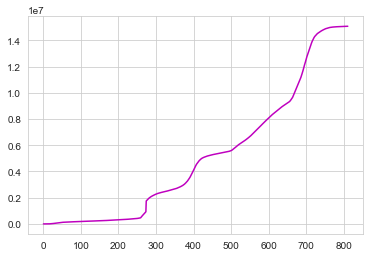

In [220]:

x1, x2, x3, x4, x5, x6 = np.array(new_covid_data['Death']),np.array(new_covid_data['Recovered']),np.array(new_covid_data['People_partially_vaccinated']),np.array(new_covid_data['People_fully_vaccinated']), np.array(curfew_data['FullCurfew']).reshape(-1, 1), np.array(curfew_data['PartialCurfew']).reshape(-1,1)
x1,x2,x3,x4 = x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1)
final_x = np.concatenate((x1,x2,x3,x4,x5,x6),axis=1)
y = np.array(covid_data['Case'])
y=y.reshape(-1,1)


plt.plot(y, '-m')
plt.show()

In [216]:
model = linear_model.LinearRegression()
model.fit(final_x, y)
accuracy = model.score(final_x, y)
print(f'Accuracy: {round(accuracy*100,3)} %')

Accuracy: 98.759 %


In [217]:
y0 = model.predict(final_x)

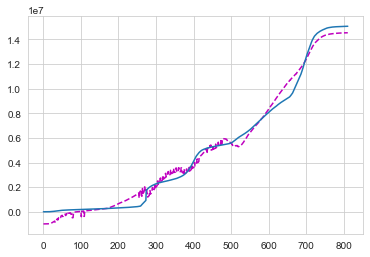

In [218]:
plt.plot(y0, '--m')
plt.plot(y)
plt.show()

<h4>Prediction of the last 30 days:</h4>

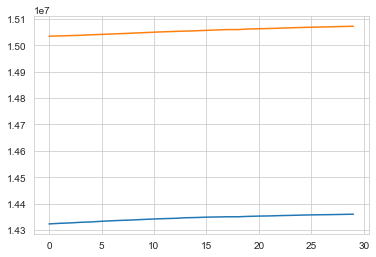

In [219]:
X_train, X_test, y_train, y_test = final_x[:-30], final_x[-30:], y[:-30], y[-30:]

new_model = linear_model.LinearRegression()
new_model.fit(X_train, y_train)

pred = new_model.predict(X_test)
plt.plot(pred)
plt.plot(y_test)
plt.show()

<h4>There is a slight difference between the 30-day predicted case count and the actual case count.</h4>
